# OpenET SIMS
## Image Class Property/Method Example
This example shows how to instantiate the model Image class for a single Landsat image using the ".from_landsat_c1_sr()" helper method.  This example also shows how to get the model variables.

In [1]:
import pprint

import ee

from IPython.display import Image
import openet.sims as model

ee.Initialize()

In [2]:
ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
jet_palette = ['0000FF', '00FFFF', 'FFFF00', 'FF0000']

### Landsat 8 Collection 1 SR Image

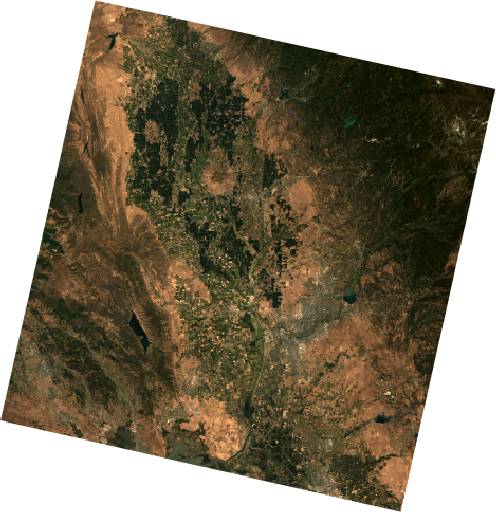

In [3]:
landsat_img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044033_20170716')
# landsat_img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044033_20170614')
Image(url=landsat_img.select([3, 2, 1]).getThumbURL({'min': 0.0, 'max': 3000}), 
      embed=True, format='png')

In [4]:
landsat_cs = 30
landsat_crs = landsat_img.select('B3').projection().getInfo()['crs']
landsat_region = landsat_img.geometry().bounds(1, 'EPSG:4326').coordinates().getInfo()
landsat_dt = ee.Date(landsat_img.get('system:time_start'))

In [5]:
# Build the SIMS object from the Landsat image
model_obj = model.Image.from_landsat_c1_sr(
    landsat_img, etr_source='projects/climate-engine/cimis/daily', etr_band='ETo',
    crop_type_source='USDA/NASS/CDL/2017',
    # crop_type_source='projects/openet/crop_type',
)

### NDVI

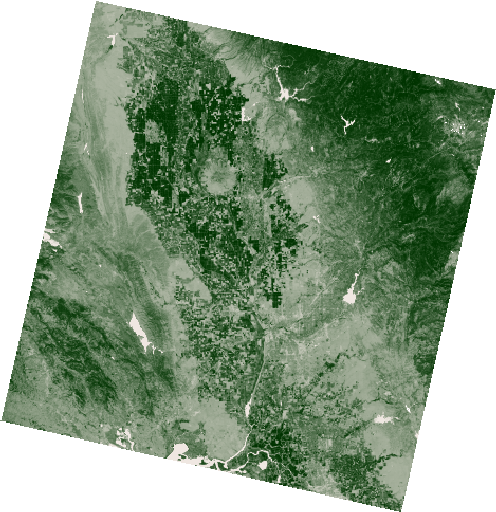

In [6]:
Image(url=model_obj.ndvi.getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette}),
      embed=True, format='png')

### Crop Type

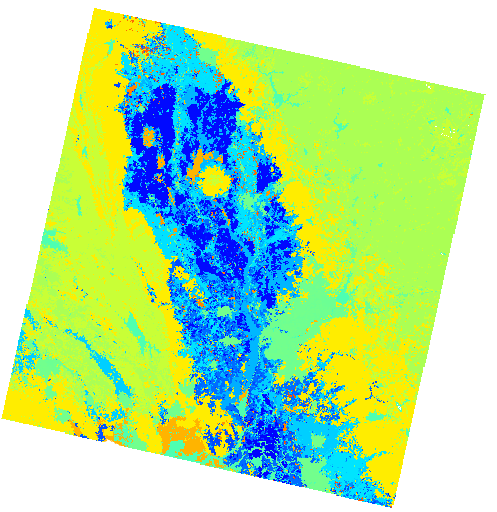

In [7]:
Image(url=model_obj.crop_type.getThumbURL({'min': 0, 'max': 255, 'palette': jet_palette, 'region': landsat_region}),
      embed=True, format='png')

### Crop Class

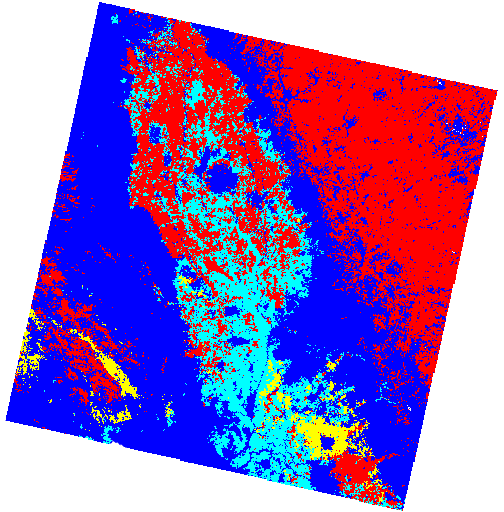

In [8]:
Image(url=model_obj.crop_class.getThumbURL({'min': 0, 'max': 3, 'palette': jet_palette}),
      embed=True, format='png')

### ET fraction

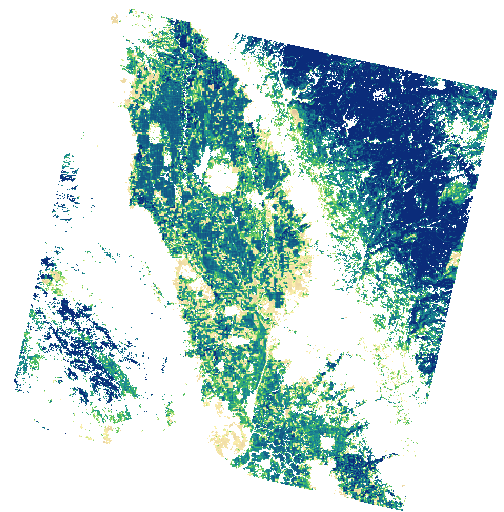

In [9]:
Image(url=model_obj.etf.getThumbURL({'min': 0.0, 'max': 1.2, 'palette': et_palette}),
      embed=True, format='png')

### Reference ET (from CIMIS)

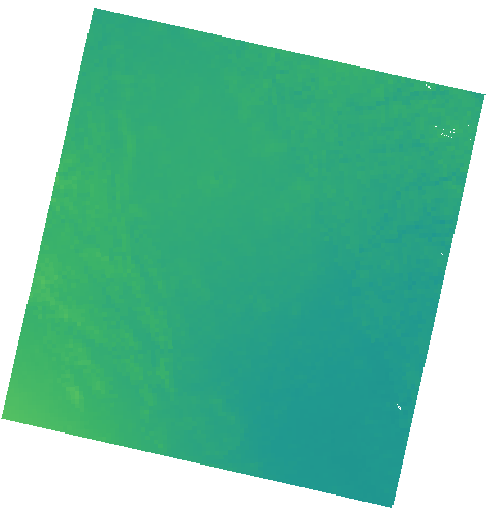

In [10]:
# Clip and project to the Landsat image footprint and coordinate system
Image(url=model_obj.etr.getThumbURL({'min': 0, 'max': 12, 'palette': et_palette, 'region': landsat_region}),
      embed=True, format='png')

### ET

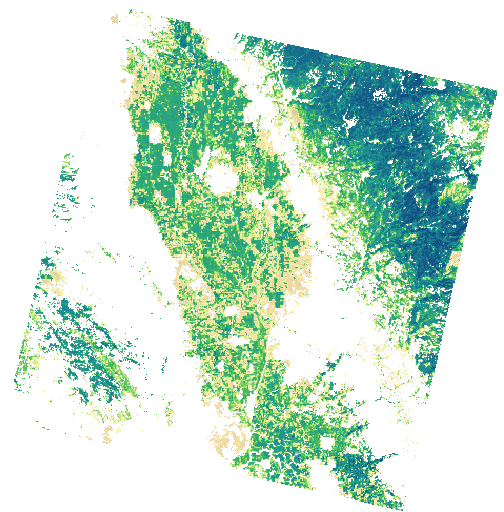

In [11]:
Image(url=model_obj.et.getThumbURL({'min': 0, 'max': 12, 'palette': et_palette}),
      embed=True, format='png')

### "Calculate" Method

Return a multiband image of the model variables

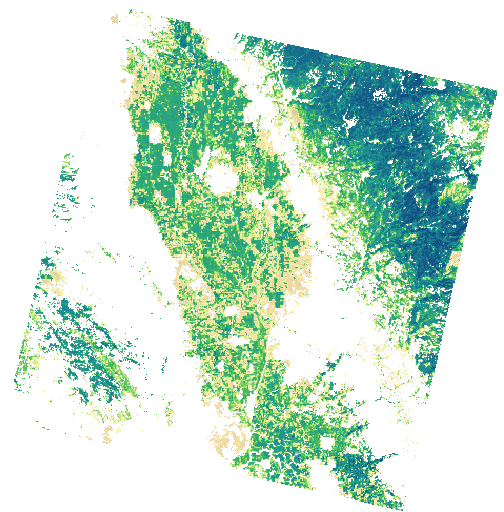

In [12]:
Image(url=model_obj.calculate(['et', 'etr', 'etf']).select(['et'])\
          .getThumbURL({'min': 0, 'max': 12, 'palette': et_palette}),
      embed=True, format='png')